In [1]:
import pandas as pd 
import ast 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
#funtction to find null values and their percentage
def null_values(df):
    pd.set_option('display.max_rows', None )
    null_values=df.isnull().sum()/len(df)*100
    nan_values=df.isna().sum()/len(df)*100
    result = pd.DataFrame({'Null Values': df.isnull().sum(),'Null Values %': null_values,'NaN Values': df.isna().sum(),'NaN Values %': nan_values})
    return result

In [3]:
# Function to find Basic Stats like mode,median,mode,min_val,Max_val of the column in Dataframe and return results in set
def basic_stats(df,column):
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode()[0]
    min_val=df[column].min()
    max_val=df[column].max()
    stats = {'mean': mean,'median': median,'mode': mode,'min': min_val,'max': max_val}
    return stats

In [4]:
def find_outliers(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include='number')

    # Calculate the first quartile (Q1) and third quartile (Q3) for each numeric column
    Q1 = numeric_df.quantile(0.25, axis=0)
    Q3 = numeric_df.quantile(0.75, axis=0)

    # Calculate the interquartile range (IQR) for each numeric column
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers for each numeric column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each numeric column
    #outliers_df = numeric_df[(numeric_df < lower_bound) | (numeric_df > upper_bound)]
    outliers_df = numeric_df[(numeric_df < lower_bound) | (numeric_df > upper_bound)].dropna(how='all')

    return outliers_df


In [5]:
#Function to draw histogram
def histo_graph(df, column, ax=None):
    # Calculate statistics for the specified column
    mean_val = df[column].mean()
    median_val = df[column].median()
    mode_val = df[column].mode()[0]

    # If an axis is provided, plot on that axis; otherwise, create a new figure
    if ax is None:
        plt.figure(figsize=(8, 6))
        ax = plt.gca()  # Get the current axis

    # Plot histogram for the specified column
    ax.hist(df[column], bins=10, edgecolor='black', alpha=0.7)

    # Add mean, median, and mode lines
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=1)
    ax.axvline(median_val, color='green', linestyle='dashed', linewidth=1)
    ax.axvline(mode_val, color='black', linestyle='dashed', linewidth=1)

    # Add annotations for mean, median, and mode
    max_ylim = ax.get_ylim()[1]
    ax.text(mean_val, max_ylim*0.9, f'Mean: {mean_val:.2f}', color='red')
    ax.text(median_val, max_ylim*0.8, f'Median: {median_val:.2f}', color='green')
    ax.text(mode_val, max_ylim*0.7, f'Mode: {mode_val:.2f}', color='black')

    # Set title and labels
    ax.set_title(f'Distribution Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

    # If no axis was provided, show the plot
    if ax is None:
        plt.show()

In [6]:
# Function to plot side by side
def plot_histo(df, columns):
    num_columns = len(columns)

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(5 * num_columns, 6))

    for i, column in enumerate(columns):
        # Call the existing histo_graph function, passing the appropriate axis
        histo_graph(df, column, ax=axes[i])  # Pass the specific axis for each subplot

    plt.tight_layout()
    plt.show()

In [7]:
business=pd.read_json(r'C:\LCIT\SEMESTER_2\ML\Ass4\yelp_dataset\yelp_academic_dataset_business.json',lines=True)

In [8]:
checkin=pd.read_json(r'C:\LCIT\SEMESTER_2\ML\Ass4\yelp_dataset\yelp_academic_dataset_checkin.json',lines=True)

In [9]:
# Create an empty list to store chunks
chunks = []

# Set the chunk size (number of lines to read at a time)
chunk_size = 10000  # Adjust the chunk size based on your system's memory

# Read the JSON file in chunks
for chunk in pd.read_json(r'C:\LCIT\SEMESTER_2\ML\Ass4\yelp_dataset\yelp_academic_dataset_user.json', lines=True, chunksize=chunk_size):
    chunks.append(chunk)  # Append each chunk to the list

# Concatenate all chunks into a single DataFrame
users = pd.concat(chunks,ignore_index=True)

In [10]:
# Create an empty list to store chunks
chunks = []

# Set the chunk size (number of lines to read at a time)
chunk_size = 10000  # Adjust the chunk size based on your system's memory

# Read the JSON file in chunks
for chunk in pd.read_json(r'C:\LCIT\SEMESTER_2\ML\Ass4\yelp_dataset\yelp_academic_dataset_review.json', lines=True, chunksize=chunk_size):
    chunks.append(chunk)  # Append each chunk to the list

# Concatenate all chunks into a single DataFrame
review = pd.concat(chunks,ignore_index=True)

In [11]:
# Create an empty list to store chunks
chunks = []

# Set the chunk size (number of lines to read at a time)
chunk_size = 10000  # Adjust the chunk size based on your system's memory

# Read the JSON file in chunks
for chunk in pd.read_json(r'C:\LCIT\SEMESTER_2\ML\Ass4\yelp_dataset\yelp_academic_dataset_tip.json', lines=True, chunksize=chunk_size):
    chunks.append(chunk)  # Append each chunk to the list

# Concatenate all chunks into a single DataFrame
tip = pd.concat(chunks,ignore_index=True)

In [12]:
pd.set_option('display.max_columns', None)

## business.json (Businesses)
This file contains information about all the businesses listed on Yelp.

### name: Name of the business.
### address, city, state, postal_code: Location details of the business.
### latitude, longitude: Geographic coordinates of the business.
### stars: Average rating (out of 5) based on user reviews.
### review_count: Number of reviews for the business.
### categories: List of categories (e.g., restaurant, coffee shop, etc.).
### is_open: Whether the business is currently operating.
### attributes: Business-related attributes like Wi-Fi availability, outdoor seating, parking, etc.
### hours: Opening and closing hours for each day of the week.

In [14]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."



## tip.json (Tips)
Contains short advice or tips left by users for businesses. This is different from reviews, as tips are shorter and meant to provide concise, practical information.

# Key Columns:
### user_id: The identifier for the user leaving the tip (links to user.json).
### business_id: Identifier for the business (links to business.json).
### text: The tip content.
### date: The date the tip was written.
### compliment_count: Number of compliments this tip has received.

In [16]:
tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


# review.json (User Reviews)
This file contains reviews written by users for businesses. Each review has a star rating, a timestamp, and text content. This is typically the largest file because of the volume of reviews.

## review_id: Unique identifier for each review.
### user_id: Identifier for the user who wrote the review.
### business_id: Identifier for the business being reviewed (links to business.json).
### stars: Rating (out of 5) given by the user in this review.
### date: Date the review was written.
### text: The content of the review.
### useful, funny, cool: User feedback metrics on how useful, funny, or cool the review was, as voted by other users.


In [18]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


## checkin.json (Check-ins)
This file records the check-in data for businesses, showing the date and time that users checked in to a business.
### Key Columns:
### business_id: Identifier for the business (links to business.json).
### date: Timestamps of check-ins, separated by commas.

In [20]:
checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


## user
Contains information about the users who write reviews, including their social connections, review activity, and Yelp ratings.

### Key Columns:
### user_id: Unique identifier for each user.
### name: The Yelp user's name.
### review_count: Number of reviews written by the user.
### yelping_since: Date when the user created their Yelp account.
### friends: A list of the user's friends (other user_ids).
### useful, funny, cool: Cumulative counts of how often the user’s reviews were rated as useful, funny, or cool by other users.
### elite: List of years in which the user achieved elite status on Yelp.
### fans: Number of fans the user has.
### average_stars: The user’s average rating (out of 5) across all their reviews.
### compliment_*: Counts of compliments the user has received in various categories (e.g., compliment_profile, compliment_cute, compliment_list, etc.).

In [22]:
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0


In [23]:
review_summary = review.groupby('business_id').agg({
    'stars': ['mean', 'count'],  # Get average rating and review count per business
    'useful': 'sum',  # Sum useful votes for all reviews of a business
})

In [24]:
review_summary.columns = ['avg_review_stars', 'review_count', 'total_useful_votes']

In [25]:
review_summary.head()

,avg_review_stars,review_count,total_useful_votes
business_id,,,
---kPU91CF4Lq2-WlRu9Lw,4.500000,24,16
--0iUa4sNDFiZFrAdIWhZQ,3.214286,14,25
--30_8IhuyMHbSOcNWd6DQ,3.555556,9,7
--7PUidqRWpRSpXebiyxTg,1.750000,12,9
--7jw19RH9JKXgFohspgQw,4.230769,13,16


In [26]:
business_merged = pd.merge(business, review_summary, on='business_id', how='left')

In [27]:
business_merged.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count_x,is_open,attributes,categories,hours,avg_review_stars,review_count_y,total_useful_votes
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,4.857143,7,9
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",3.133333,15,19
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",3.500000,24,21
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",4.057471,87,131
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",4.692308,13,2


In [28]:
user_summary = review.merge(users, on='user_id',how='left')

In [29]:
user_summary.head()

,review_id,user_id,business_id,stars,useful_x,funny_x,cool_x,text,date,name,review_count,yelping_since,useful_y,funny_y,cool_y,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Melanie,33.0,2016-01-13 17:20:44,32.0,3.0,8.0,,"DS9QBM_NWJz1E279Zrao-A, XdXgIs4i5JFvtJf0rJlWsA...",0.0,4.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Erin,10.0,2011-03-07 19:45:15,6.0,1.0,2.0,,"7uYgWwryg8KH33i1SLJUTQ, 0mGJMNL8o2AY4BT1d4TTDQ...",0.0,4.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Debra,1332.0,2012-09-04 23:57:25,1660.0,675.0,1300.0,"2014,2015,2016,2017,2018,2019,20,20,2021","IaqwLtG5Se-kt_MHBOalag, tBpyi-tXOYQlkjtQKPd5aw...",58.0,4.69,16.0,14.0,3.0,1.0,1.0,63.0,96.0,86.0,86.0,49.0,27.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Kyle,9.0,2014-01-17 19:20:57,1.0,0.0,1.0,,None,0.0,4.78,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Sophia,126.0,2008-04-17 13:39:54,74.0,20.0,12.0,,None,0.0,2.97,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0


In [30]:
# Aggregate user data to create summary stats for users who reviewed the business
user_summary_agg= user_summary.groupby('business_id').agg({
    'elite': 'count',  # Number of reviews written by elite users grouped by bussiness
    'review_count': 'mean',  # Average number of reviews per reviewer grouped by bussiness
    'fans': 'mean',  # Average number of fans of reviewers grouped by bussiness
})

In [31]:
user_summary_agg.head()

,elite,review_count,fans
business_id,,,
---kPU91CF4Lq2-WlRu9Lw,24,43.958333,2.125000
--0iUa4sNDFiZFrAdIWhZQ,14,241.785714,13.571429
--30_8IhuyMHbSOcNWd6DQ,9,44.444444,0.444444
--7PUidqRWpRSpXebiyxTg,12,301.750000,14.833333
--7jw19RH9JKXgFohspgQw,13,54.230769,4.153846


In [32]:
user_summary_agg.columns = ['elite_user_count', 'review_count_per_bussiness', 'avg_fans_per_reviewer']

In [33]:
business_merged = pd.merge(business_merged, user_summary_agg, on='business_id', how='left')

In [34]:
business_merged.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count_x,is_open,attributes,categories,hours,avg_review_stars,review_count_y,total_useful_votes,elite_user_count,review_count_per_bussiness,avg_fans_per_reviewer
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,4.857143,7,9,7,18.428571,0.571429
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",3.133333,15,19,15,138.266667,5.733333
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",3.500000,24,21,24,260.375000,27.833333
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",4.057471,87,131,87,315.908046,27.896552
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",4.692308,13,2,13,82.230769,4.615385


In [35]:
checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [36]:
# Split the 'date' column by commas to get individual check-ins and count them
checkin['checkin_count'] = checkin['date'].apply(lambda x: len(str(x).split(',')))

In [37]:
checkin.head()

,business_id,date,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...",11
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...",10
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22",2
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...",10
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...",26


In [38]:
# Count total check-ins per business
checkin_summary = checkin.groupby('business_id').agg({'checkin_count': 'sum'})

In [39]:
checkin_summary.head()

,checkin_count
business_id,
---kPU91CF4Lq2-WlRu9Lw,11
--0iUa4sNDFiZFrAdIWhZQ,10
--30_8IhuyMHbSOcNWd6DQ,2
--7PUidqRWpRSpXebiyxTg,10
--7jw19RH9JKXgFohspgQw,26


In [40]:
business_merged = pd.merge(business_merged, checkin_summary, on='business_id', how='left')

In [41]:
tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [42]:
# Aggregate tip data by business_id
tip_summary = tip.groupby('business_id').agg({'text': 'count', 'compliment_count': 'sum'}).rename(columns={'text': 'tip_count', 'compliment_count': 'total_compliments'})

In [43]:
# Merge with business data
business_merged = pd.merge(business_merged, tip_summary, on='business_id', how='left')

In [44]:
business_merged.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count_x,is_open,attributes,categories,hours,avg_review_stars,review_count_y,total_useful_votes,elite_user_count,review_count_per_bussiness,avg_fans_per_reviewer,checkin_count,tip_count,total_compliments
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,4.857143,7,9,7,18.428571,0.571429,1.0,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",3.133333,15,19,15,138.266667,5.733333,15.0,1.0,0.0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",3.500000,24,21,24,260.375000,27.833333,401.0,8.0,0.0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",4.057471,87,131,87,315.908046,27.896552,335.0,10.0,0.0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",4.692308,13,2,13,82.230769,4.615385,14.0,1.0,0.0


In [45]:
null_values(business_merged)

,Null Values,Null Values %,NaN Values,NaN Values %
business_id,0,0.000000,0,0.000000
name,0,0.000000,0,0.000000
address,0,0.000000,0,0.000000
city,0,0.000000,0,0.000000
state,0,0.000000,0,0.000000
postal_code,0,0.000000,0,0.000000
latitude,0,0.000000,0,0.000000
longitude,0,0.000000,0,0.000000
stars,0,0.000000,0,0.000000
review_count_x,0,0.000000,0,0.000000


In [46]:
business_merged.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count_x,is_open,attributes,categories,hours,avg_review_stars,review_count_y,total_useful_votes,elite_user_count,review_count_per_bussiness,avg_fans_per_reviewer,checkin_count,tip_count,total_compliments
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,4.857143,7,9,7,18.428571,0.571429,1.0,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",3.133333,15,19,15,138.266667,5.733333,15.0,1.0,0.0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",3.500000,24,21,24,260.375000,27.833333,401.0,8.0,0.0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",4.057471,87,131,87,315.908046,27.896552,335.0,10.0,0.0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",4.692308,13,2,13,82.230769,4.615385,14.0,1.0,0.0


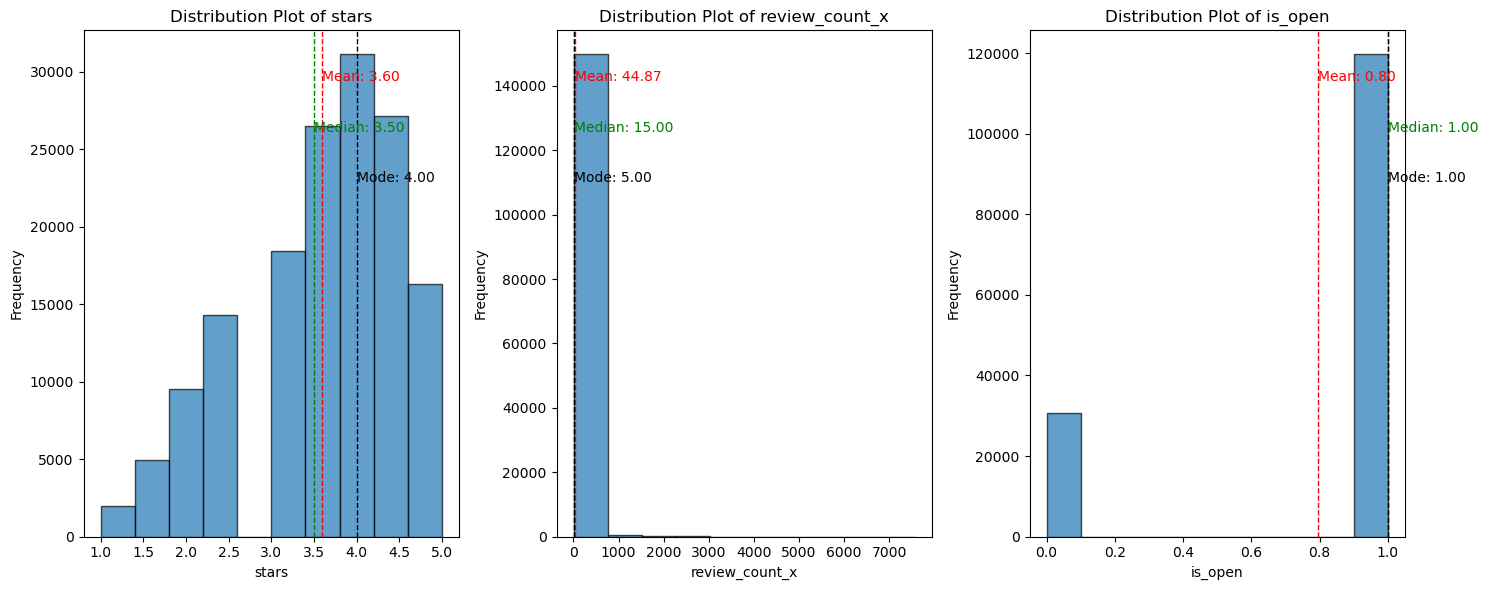

In [47]:
# List of columns to plot
val_parms = ["stars", "review_count_x", "is_open"]

# Create a figure with subplots
num_columns = len(val_parms)
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(5 * num_columns, 6))

# Call the histo_graph function for each column, passing the corresponding axis
for i, column in enumerate(val_parms):
    histo_graph(business_merged, column, ax=axes[i]) 

plt.tight_layout()
plt.show()

## Creating a Target Variable

### The metrics to what makes a bussiness successful. 

#### 1) is bussiness has good Ratings (>4 stars)
#### 2) is bussiness has sufficient review count (i.e. >100 reviews)


#### if all the above conditions are met then we are saying that bussiness is successful

In [49]:
#business_merged.describe(include='all')

In [50]:
business_merged.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count_x,is_open,attributes,categories,hours,avg_review_stars,review_count_y,total_useful_votes,elite_user_count,review_count_per_bussiness,avg_fans_per_reviewer,checkin_count,tip_count,total_compliments
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,4.857143,7,9,7,18.428571,0.571429,1.0,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",3.133333,15,19,15,138.266667,5.733333,15.0,1.0,0.0


In [51]:
# Define business Successful: A business is validated if it has > 4 stars, and has more than 100 reviews.
business_merged['success'] = (business_merged['stars'] > 4) & (business_merged['review_count_x'] > 100)

In [52]:
business_merged['success']=business_merged['success'].astype(int)

### Dropped one of feature used for metric, so dropped stars. Because compare to review count, the model will understand the positive and negative class easily which can lead to perform poorly on new data/ unseen data

In [54]:
business_merged.drop(columns='stars', inplace=True)

In [55]:
business_merged.dtypes

business_id                    object
name                           object
address                        object
city                           object
state                          object
postal_code                    object
latitude                      float64
longitude                     float64
review_count_x                  int64
is_open                         int64
attributes                     object
categories                     object
hours                          object
avg_review_stars              float64
review_count_y                  int64
total_useful_votes              int64
elite_user_count                int64
review_count_per_bussiness    float64
avg_fans_per_reviewer         float64
checkin_count                 float64
tip_count                     float64
total_compliments             float64
success                         int32
dtype: object

In [56]:
print(business_merged['success'].describe())# basics stats to understand our target variable
print(business_merged['success'].value_counts(normalize=True)*100) # class disturbution of our taget variable

count    150346.000000
mean          0.023399
std           0.151169
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: success, dtype: float64
success
0    97.660064
1     2.339936
Name: proportion, dtype: float64


### Here we can see that our class is imbalnced so we undersample our majority class (i.e."class 0")

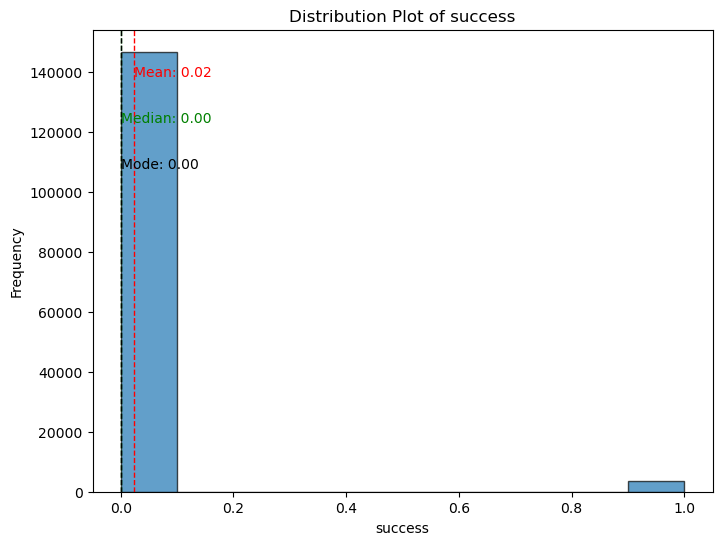

In [58]:
histo_graph(business_merged,'success')

In [59]:
business_merged.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count_x,is_open,attributes,categories,hours,avg_review_stars,review_count_y,total_useful_votes,elite_user_count,review_count_per_bussiness,avg_fans_per_reviewer,checkin_count,tip_count,total_compliments,success
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,4.857143,7,9,7,18.428571,0.571429,1.0,NaN,NaN,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",3.133333,15,19,15,138.266667,5.733333,15.0,1.0,0.0,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",3.500000,24,21,24,260.375000,27.833333,401.0,8.0,0.0,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",4.057471,87,131,87,315.908046,27.896552,335.0,10.0,0.0,0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",4.692308,13,2,13,82.230769,4.615385,14.0,1.0,0.0,0


In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from joblib import Parallel, delayed
from scipy.sparse import vstack

In [61]:
# Function to fit and transform data using CountVectorizer
def fit_transform_count_vectorizer(categories):
    vectorizer = CountVectorizer(
        max_features=50,
        ngram_range=(1,2),  # Corrected ngram range to (1, 3) which is valid
        stop_words=['active','american','new'],
        min_df=30,
        max_df=0.9
    )
    X = vectorizer.fit_transform(categories)
    return X, vectorizer  # Return both X and the vectorizer as a tuple

# Ensure that 'categories' contains only strings
business_merged['categories'] = business_merged['categories'].fillna('').astype(str)

# Function to split data into chunks for parallel processing
def chunk_data(data, n_chunks):
    chunk_size = len(data) // n_chunks
    return [data[i * chunk_size:(i + 1) * chunk_size] for i in range(n_chunks)]

# Split data into chunks for parallel processing
n_chunks = 2  # Number of parallel processes
data_chunks = chunk_data(business_merged['categories'].values, n_chunks)

# Use joblib for parallel processing
results = Parallel(n_jobs=-1)(delayed(fit_transform_count_vectorizer)(chunk) for chunk in data_chunks)

# Combine the results from each chunk
X_combined = None
vectorizer_combined = None
for result in results:
    X, vectorizer = result  # Unpack each result as a tuple
    if X_combined is None:
        X_combined = X
        vectorizer_combined = vectorizer
    else:
        X_combined = vstack([X_combined, X])  # Combine sparse matrices

# Now X_combined contains the combined sparse matrix from all chunks


In [62]:
# Convert the combined sparse matrix to a DataFrame for better visualization
features_df = pd.DataFrame(X_combined.toarray(), columns=vectorizer.get_feature_names_out())


In [63]:
features_df.head()

,arts,auto,automotive,bars,beauty,beauty spas,breakfast,breakfast brunch,brunch,burgers,coffee,coffee tea,entertainment,event,event planning,fashion,fast,fast food,food,garden,hair,hair salons,health,health medical,home,home garden,home services,hotels,hotels travel,life,local,local services,medical,nightlife,pet,pizza,planning,planning services,repair,restaurants,salons,sandwiches,services,shopping,shops,spas,stores,tea,traditional,travel
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
features_df.shape

(150346, 50)

In [65]:
# Calculate the percentage of zeros in each column
zero_percentage = (features_df == 0).sum() / len(features_df) * 100

# Sort the result in descending order
zero_percentage_sorted = zero_percentage.sort_values(ascending=True)

# Display the sorted result
print(zero_percentage_sorted)


restaurants          65.234858
services             73.137297
food                 77.781251
shopping             83.774094
home                 87.925186
home services        90.451359
beauty spas          90.493927
spas                 90.493927
beauty               90.565097
local                91.512245
bars                 91.657909
health               91.747037
nightlife            91.831509
medical              92.035039
health medical       92.091575
local services       92.551847
breakfast            92.998816
planning             93.365969
stores               93.390579
planning services    93.418515
event                93.418515
event planning       93.418515
repair               93.429822
automotive           93.984542
salons               94.284517
sandwiches           94.435502
traditional          94.466098
life                 94.727495
hair                 95.181781
pizza                95.282216
tea                  95.298179
arts                 95.451824
coffee  

In [66]:
# Concatenate the features DataFrame with the main DataFrame
#df_final= pd.concat([df.reset_index(drop=True), features_df.reset_index(drop=True)], axis=1)


#### If you observe attributes feature here the data is form dictionary key,value pairs. in this we have some important features like wheter the place is wheel chair accessble or not, wether there is parking available or not ?? etc..
#### so , we extracting some important features from this and making them new features 

In [68]:
def extract_unique_keys(specs_column):
    unique_keys = set()
    none_count = 0  # To keep track of None occurrences
    
    # Iterate through each row in the column
    for specs in specs_column:
        if isinstance(specs, dict):  # Ensure it's a dictionary
            unique_keys.update(specs.keys())  # Add keys to the set
        elif specs is None:  # If the value is None
            none_count += 1
        else:
            print(f"Unexpected type: {type(specs)} - Value: {specs}")  # Debug output for unexpected types
    
    # Optionally print or return how many None values were found
    if none_count > 0:
        print(f"Encountered {none_count} 'None' values in the column.")
    
    return unique_keys


In [69]:
# Get the unique keys from the 'attributes' column
unique_spec_keys = extract_unique_keys(business_merged['attributes'])

# Print the results
print("No of Unique keys in 'attributes':", len(unique_spec_keys))
print("Unique keys in 'attributes':", unique_spec_keys)

Encountered 13744 'None' values in the column.
No of Unique keys in 'attributes': 39
Unique keys in 'attributes': {'GoodForMeal', 'OutdoorSeating', 'AgesAllowed', 'Open24Hours', 'RestaurantsDelivery', 'WiFi', 'NoiseLevel', 'ByAppointmentOnly', 'RestaurantsReservations', 'DietaryRestrictions', 'HappyHour', 'RestaurantsCounterService', 'WheelchairAccessible', 'BYOB', 'BusinessAcceptsBitcoin', 'GoodForKids', 'Corkage', 'BusinessParking', 'HasTV', 'RestaurantsPriceRange2', 'BusinessAcceptsCreditCards', 'Music', 'DriveThru', 'AcceptsInsurance', 'RestaurantsTableService', 'GoodForDancing', 'BYOBCorkage', 'RestaurantsTakeOut', 'Alcohol', 'DogsAllowed', 'CoatCheck', 'Ambience', 'RestaurantsAttire', 'BikeParking', 'BestNights', 'RestaurantsGoodForGroups', 'HairSpecializesIn', 'Smoking', 'Caters'}


In [70]:
# Step 2: Create a new DataFrame with the same index as the original DataFrame
temp_df = pd.DataFrame(index=business_merged.index)

# Step 3: Create new columns for each unique key
for key in unique_spec_keys:
    temp_df[key] = None  # Initialize new columns with None

# Step 4: Populate the new DataFrame based on the dictionary values in 'attributes'
for idx, specs in business_merged['attributes'].items():
    if isinstance(specs, dict):  # Ensure that the value is a dictionary
        for key in specs:
            if key in unique_spec_keys:  # Populate the column if the key exists
                temp_df.at[idx, key] = specs[key]

In [71]:
# Step 5: Display the new DataFrame to check the results
temp_df.sample(n=5)

,GoodForMeal,OutdoorSeating,AgesAllowed,Open24Hours,RestaurantsDelivery,WiFi,NoiseLevel,ByAppointmentOnly,RestaurantsReservations,DietaryRestrictions,HappyHour,RestaurantsCounterService,WheelchairAccessible,BYOB,BusinessAcceptsBitcoin,GoodForKids,Corkage,BusinessParking,HasTV,RestaurantsPriceRange2,BusinessAcceptsCreditCards,Music,DriveThru,AcceptsInsurance,RestaurantsTableService,GoodForDancing,BYOBCorkage,RestaurantsTakeOut,Alcohol,DogsAllowed,CoatCheck,Ambience,RestaurantsAttire,BikeParking,BestNights,RestaurantsGoodForGroups,HairSpecializesIn,Smoking,Caters
95645,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"{'garage': False, 'street': False, 'validated'...",None,2,True,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,None,None
38045,"{'dessert': False, 'latenight': False, 'lunch'...",None,None,None,False,None,None,None,None,None,None,None,None,None,False,None,None,"{'garage': False, 'street': True, 'validated':...",None,1,True,None,None,None,None,None,None,True,u'none',None,None,None,None,True,None,None,None,None,True
90862,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
134768,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
139599,None,None,None,None,True,u'free',None,False,None,None,None,None,None,None,None,None,None,"{'garage': False, 'street': False, 'validated'...",None,1,True,None,None,None,None,None,None,True,'none',None,None,None,None,False,None,None,None,None,True


In [72]:
# Print unique values for each column in new_df
for column in temp_df.columns:
    unique_vals = temp_df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_vals)
    print()  # Blank line for readability


Unique values in 'GoodForMeal':
[None
 "{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}"
 "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': False}"
 "{'dessert': True, 'latenight': None, 'lunch': None, 'dinner': True, 'brunch': None, 'breakfast': None}"
 "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}"
 "{'dessert': None, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': None, 'breakfast': False}"
 "{'dessert': None, 'latenight': None, 'lunch': None, 'dinner': True, 'brunch': None, 'breakfast': None}"
 "{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': True, 'breakfast': False}"
 "{'dessert': False, 'latenight': True, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}"
 "{'dessert': False, 'latenight': True, 'lunch': False, 'dinner': True, 'brunch': False

#### we can see that some of our features are having unnessesary duplicates in values like ['u"True"', "'True'"], so we are going to clean that 
#### Dictionaries like ['BusinessParking', 'Ambience' etc..] are stored as strings , so we are converting them back to dict, so we can easly work with them 

In [74]:
# Function to clean and normalize boolean columns
def normalize_boolean(value):
    true_values = {'True', 'true', "u'True'", 'u"True"', "'True'", "'true'"}
    false_values = {'False', 'false', "u'False'", 'u"False"', "'False'", "'false'"}
    
    if isinstance(value, str):
        if value in true_values:
            return True
        elif value in false_values:
            return False
    return value

# Apply boolean normalization
bool_cols = [
    'WheelchairAccessible', 'DogsAllowed', 'GoodForKids', 'RestaurantsDelivery', 
    'BYOB', 'BikeParking', 'RestaurantsReservations', 'BusinessAcceptsCreditCards',
    'RestaurantsCounterService', 'Open24Hours', 'HappyHour', 'Caters', 
    'BusinessAcceptsBitcoin', 'HasTV'
]
for col in bool_cols:
    temp_df[col] = temp_df[col].apply(normalize_boolean)

# Function to parse dictionary strings
def parse_dict_string(value):
    if isinstance(value, str) and value.startswith('{'):
        try:
            return ast.literal_eval(value)
        except (ValueError, SyntaxError):
            return value  # return original if parsing fails
    return value

# Parse dictionary columns
dict_cols = ['GoodForMeal', 'BusinessParking', 'Ambience', 'DietaryRestrictions', 'Music', 'BestNights','HairSpecializesIn']
for col in dict_cols:
    temp_df[col] = temp_df[col].apply(parse_dict_string)

# Normalize WiFi, RestaurantsAttire, and Alcohol
def normalize_string_column(column):
    return column.apply(lambda x: None if x is None else x.replace("u'", "").replace("'", "").strip())

# List of columns to normalize
string_cols = [
    'WiFi', 'RestaurantsAttire', 'NoiseLevel', 'Smoking', 'AgesAllowed', 'Alcohol','BYOBCorkage'
]

# Apply normalization to each column in the list
for col in string_cols:
    temp_df[col] = normalize_string_column(temp_df[col])


In [75]:
# Display cleaned DataFrame
temp_df.sample(n=10)

,GoodForMeal,OutdoorSeating,AgesAllowed,Open24Hours,RestaurantsDelivery,WiFi,NoiseLevel,ByAppointmentOnly,RestaurantsReservations,DietaryRestrictions,HappyHour,RestaurantsCounterService,WheelchairAccessible,BYOB,BusinessAcceptsBitcoin,GoodForKids,Corkage,BusinessParking,HasTV,RestaurantsPriceRange2,BusinessAcceptsCreditCards,Music,DriveThru,AcceptsInsurance,RestaurantsTableService,GoodForDancing,BYOBCorkage,RestaurantsTakeOut,Alcohol,DogsAllowed,CoatCheck,Ambience,RestaurantsAttire,BikeParking,BestNights,RestaurantsGoodForGroups,HairSpecializesIn,Smoking,Caters
87780,None,None,None,None,None,no,None,None,None,None,None,None,None,None,None,None,None,"{'garage': False, 'street': False, 'validated'...",None,1,True,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None
8550,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
109312,None,None,None,None,None,no,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
87968,None,None,None,None,True,free,None,None,None,None,None,None,None,None,None,None,None,None,None,1,True,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None
57897,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
73734,None,None,None,None,None,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
67056,None,False,None,None,False,free,average,None,False,None,None,None,None,None,None,True,None,"{'garage': False, 'street': False, 'validated'...",None,1,True,None,None,None,False,None,None,True,none,None,None,"{'romantic': False, 'intimate': False, 'classy...",casual,True,None,None,None,None,None
83962,"{'dessert': False, 'latenight': False, 'lunch'...",False,None,None,True,free,None,None,False,None,True,None,True,False,False,None,False,"{'garage': False, 'street': True, 'validated':...",False,2,True,None,None,None,False,None,None,True,full_bar,False,None,"{'touristy': None, 'hipster': None, 'romantic'...",None,False,None,True,None,None,True
113133,"{'dessert': False, 'latenight': False, 'lunch'...",False,None,None,False,no,average,None,False,None,None,None,None,None,None,True,None,"{'garage': False, 'street': None, 'validated':...",True,1,True,None,None,None,None,None,None,True,none,False,None,"{'romantic': False, 'intimate': False, 'classy...",casual,True,None,True,None,None,True
65346,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [77]:
# Print unique values for each column in temp_df
for column in temp_df.columns:
    # Check if the column is empty or contains only None values
    if temp_df[column].isnull().all():
        print(f"Column '{column}' is empty or contains only None values.")
        print()
        continue

    # Attempt to get unique values
    try:
        unique_vals = temp_df[column].unique()

        # Convert dictionaries to strings if they exist
        unique_vals = [str(val) if isinstance(val, dict) else val for val in unique_vals]

        print(f"Unique values in '{column}':")
        print(unique_vals)
        print()  # Blank line for readability

    except Exception as e:
        print(f"Error processing column '{column}': {e}")
        print()


Error processing column 'GoodForMeal': unhashable type: 'dict'

Unique values in 'OutdoorSeating':
[None, 'False', 'True', 'None']

Unique values in 'AgesAllowed':
[None, '21plus', 'allages', '18plus']

Unique values in 'Open24Hours':
[None, True, False]

Unique values in 'RestaurantsDelivery':
[None, False, True, 'None']

Unique values in 'WiFi':
[None, 'no', 'free', 'None', 'paid']

Unique values in 'NoiseLevel':
[None, 'average', 'quiet', 'loud', 'very_loud', 'None']

Unique values in 'ByAppointmentOnly':
['True', None, 'False', 'None']

Unique values in 'RestaurantsReservations':
[None, False, True, 'None']

Error processing column 'DietaryRestrictions': unhashable type: 'dict'

Unique values in 'HappyHour':
[None, False, True, 'None']

Unique values in 'RestaurantsCounterService':
[None, True, False]

Unique values in 'WheelchairAccessible':
[None, True, False, 'None']

Unique values in 'BYOB':
[None, False, True, 'None']

Unique values in 'BusinessAcceptsBitcoin':
[None, False, T

In [78]:
def extract_unique_keys(column):
    """Extract unique keys from a column that contains dictionaries."""
    unique_keys = set()  # Use a set to collect unique keys

    for item in column:
        if isinstance(item, dict):
            # If the item is a dictionary, update the set with its keys
            unique_keys.update(item.keys())
        elif isinstance(item, str) and item.startswith("{"): 
            # If the item is a string representation of a dictionary, convert it
            try:
                dict_item = ast.literal_eval(item)  # Safely evaluate the string to a dictionary
                if isinstance(dict_item, dict):
                    unique_keys.update(dict_item.keys())
            except Exception as e:
                print(f"Error processing string as dict: {e}")

    return unique_keys

dict_cols = ['GoodForMeal', 'BusinessParking', 'Ambience', 'DietaryRestrictions', 'Music', 'BestNights','HairSpecializesIn']
for col in dict_cols:
    # Get the unique keys from the specified columns
    unique_spec_keys = extract_unique_keys(temp_df[col])

    # Print the results
    print(f"No of Unique keys in '{col}':", len(unique_spec_keys))
    print(f"Unique keys in '{col}':", unique_spec_keys)
    print()  # Blank line for readability


No of Unique keys in 'GoodForMeal': 6
Unique keys in 'GoodForMeal': {'brunch', 'dinner', 'dessert', 'breakfast', 'latenight', 'lunch'}

No of Unique keys in 'BusinessParking': 5
Unique keys in 'BusinessParking': {'garage', 'validated', 'lot', 'valet', 'street'}

No of Unique keys in 'Ambience': 9
Unique keys in 'Ambience': {'hipster', 'intimate', 'romantic', 'classy', 'touristy', 'casual', 'trendy', 'divey', 'upscale'}

No of Unique keys in 'DietaryRestrictions': 7
Unique keys in 'DietaryRestrictions': {'kosher', 'soy-free', 'gluten-free', 'vegan', 'vegetarian', 'dairy-free', 'halal'}

No of Unique keys in 'Music': 7
Unique keys in 'Music': {'background_music', 'jukebox', 'video', 'live', 'dj', 'karaoke', 'no_music'}

No of Unique keys in 'BestNights': 7
Unique keys in 'BestNights': {'wednesday', 'friday', 'tuesday', 'thursday', 'sunday', 'monday', 'saturday'}

No of Unique keys in 'HairSpecializesIn': 8
Unique keys in 'HairSpecializesIn': {'coloring', 'kids', 'africanamerican', 'curly

In [79]:
def extract_features(df, dict_cols):
    for col in dict_cols:
        # Create new columns based on the keys in the dictionary
        unique_keys = set()
        
        for item in df[col]:
            if isinstance(item, dict):
                unique_keys.update(item.keys())
        
        # Create new columns in the DataFrame
        for key in unique_keys:
            df[f"{col}_{key}"] = df[col].apply(lambda x: x.get(key, None) if isinstance(x, dict) else None)
        
    # Drop the original dictionary columns
    df.drop(columns=dict_cols, inplace=True)

# List of columns to analyze
dict_cols = [ 'BusinessParking','GoodForMeal', 'Ambience', 'DietaryRestrictions', 'Music', 'BestNights','HairSpecializesIn']

# Extract features
extract_features(temp_df, dict_cols)

In [80]:
temp_df.sample(n=10)

,OutdoorSeating,AgesAllowed,Open24Hours,RestaurantsDelivery,WiFi,NoiseLevel,ByAppointmentOnly,RestaurantsReservations,HappyHour,RestaurantsCounterService,WheelchairAccessible,BYOB,BusinessAcceptsBitcoin,GoodForKids,Corkage,HasTV,RestaurantsPriceRange2,BusinessAcceptsCreditCards,DriveThru,AcceptsInsurance,RestaurantsTableService,GoodForDancing,BYOBCorkage,RestaurantsTakeOut,Alcohol,DogsAllowed,CoatCheck,RestaurantsAttire,BikeParking,RestaurantsGoodForGroups,Smoking,Caters,BusinessParking_garage,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,BusinessParking_street,GoodForMeal_brunch,GoodForMeal_dinner,GoodForMeal_dessert,GoodForMeal_breakfast,GoodForMeal_latenight,GoodForMeal_lunch,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_classy,Ambience_touristy,Ambience_casual,Ambience_trendy,Ambience_divey,Ambience_upscale,DietaryRestrictions_kosher,DietaryRestrictions_soy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_vegetarian,DietaryRestrictions_dairy-free,DietaryRestrictions_halal,Music_background_music,Music_jukebox,Music_video,Music_live,Music_dj,Music_karaoke,Music_no_music,BestNights_wednesday,BestNights_friday,BestNights_tuesday,BestNights_thursday,BestNights_sunday,BestNights_monday,BestNights_saturday,HairSpecializesIn_coloring,HairSpecializesIn_kids,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_asian,HairSpecializesIn_perms,HairSpecializesIn_extensions,HairSpecializesIn_straightperms
36938,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
98589,True,None,None,True,free,average,None,True,None,None,None,None,None,True,None,False,1,True,None,None,False,None,None,True,none,None,None,casual,True,True,None,None,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
103269,None,None,None,None,None,None,True,None,None,None,None,None,False,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
18630,True,None,None,True,None,None,None,False,None,None,None,None,None,True,None,True,1,True,True,None,None,None,None,True,none,None,None,casual,False,True,None,None,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
30120,False,None,None,None,None,loud,None,True,None,None,None,None,None,None,None,True,2,True,None,None,None,None,None,True,full_bar,None,None,casual,None,True,None,None,False,False,False,False,False,None,None,None,None,None,None,False,False,False,False,False,False,False,False,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
81732,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Non

In [81]:
# Print unique values for each column in temp_df
for column in temp_df.columns:
    # Check if the column is empty or contains only None values
    if temp_df[column].isnull().all():
        print(f"Column '{column}' is empty or contains only None values.")
        print()
        continue

    # Attempt to get unique values
    try:
        unique_vals = temp_df[column].unique()

        # Convert dictionaries to strings if they exist
        unique_vals = [str(val) if isinstance(val, dict) else val for val in unique_vals]

        print(f"Unique values in '{column}':")
        print(unique_vals)
        print()  # Blank line for readability

    except Exception as e:
        print(f"Error processing column '{column}': {e}")
        print()

Unique values in 'OutdoorSeating':
[None, 'False', 'True', 'None']

Unique values in 'AgesAllowed':
[None, '21plus', 'allages', '18plus']

Unique values in 'Open24Hours':
[None, True, False]

Unique values in 'RestaurantsDelivery':
[None, False, True, 'None']

Unique values in 'WiFi':
[None, 'no', 'free', 'None', 'paid']

Unique values in 'NoiseLevel':
[None, 'average', 'quiet', 'loud', 'very_loud', 'None']

Unique values in 'ByAppointmentOnly':
['True', None, 'False', 'None']

Unique values in 'RestaurantsReservations':
[None, False, True, 'None']

Unique values in 'HappyHour':
[None, False, True, 'None']

Unique values in 'RestaurantsCounterService':
[None, True, False]

Unique values in 'WheelchairAccessible':
[None, True, False, 'None']

Unique values in 'BYOB':
[None, False, True, 'None']

Unique values in 'BusinessAcceptsBitcoin':
[None, False, True, 'None']

Unique values in 'GoodForKids':
[None, True, False, 'None']

Unique values in 'Corkage':
[None, 'True', 'False', 'None']



##### Unique values in 'BYOBCorkage':[None, "'yes_free'", "'no'", "'yes_corkage'", "u'yes_free'", "u'yes_corkage'", "u'no'", 'None']

#### as from the above line we can see that some catogorical values also having this issue , so we are going to clean them as well

In [83]:
# Function to clean boolean string columns
def clean_column(series):
    # Replace 'None' strings with actual None
    series = series.replace('None', None)
    series = series.replace('none', None)
    return series

# Apply cleaning function to each specified column
for column in temp_df.columns:
    if column in temp_df.columns:
        temp_df[column] = clean_column(temp_df[column])

In [84]:
# Print unique values for each column in temp_df
for column in temp_df.columns:
    # Check if the column is empty or contains only None values
    if temp_df[column].isnull().all():
        print(f"Column '{column}' is empty or contains only None values.")
        print()
        continue

    # Attempt to get unique values
    try:
        unique_vals = temp_df[column].unique()

        # Convert dictionaries to strings if they exist
        unique_vals = [str(val) if isinstance(val, dict) else val for val in unique_vals]

        print(f"Unique values in '{column}':")
        print(unique_vals)
        print()  # Blank line for readability

    except Exception as e:
        print(f"Error processing column '{column}': {e}")
        print()

Unique values in 'OutdoorSeating':
[None, 'False', 'True']

Unique values in 'AgesAllowed':
[None, '21plus', 'allages', '18plus']

Unique values in 'Open24Hours':
[None, True, False]

Unique values in 'RestaurantsDelivery':
[None, False, True]

Unique values in 'WiFi':
[None, 'no', 'free', 'paid']

Unique values in 'NoiseLevel':
[None, 'average', 'quiet', 'loud', 'very_loud']

Unique values in 'ByAppointmentOnly':
['True', None, 'False']

Unique values in 'RestaurantsReservations':
[None, False, True]

Unique values in 'HappyHour':
[None, False, True]

Unique values in 'RestaurantsCounterService':
[None, True, False]

Unique values in 'WheelchairAccessible':
[None, True, False]

Unique values in 'BYOB':
[None, False, True]

Unique values in 'BusinessAcceptsBitcoin':
[None, False, True]

Unique values in 'GoodForKids':
[None, True, False]

Unique values in 'Corkage':
[None, 'True', 'False']

Unique values in 'HasTV':
[None, False, True]

Unique values in 'RestaurantsPriceRange2':
[None,

In [85]:
temp_df.sample(n=10)

,OutdoorSeating,AgesAllowed,Open24Hours,RestaurantsDelivery,WiFi,NoiseLevel,ByAppointmentOnly,RestaurantsReservations,HappyHour,RestaurantsCounterService,WheelchairAccessible,BYOB,BusinessAcceptsBitcoin,GoodForKids,Corkage,HasTV,RestaurantsPriceRange2,BusinessAcceptsCreditCards,DriveThru,AcceptsInsurance,RestaurantsTableService,GoodForDancing,BYOBCorkage,RestaurantsTakeOut,Alcohol,DogsAllowed,CoatCheck,RestaurantsAttire,BikeParking,RestaurantsGoodForGroups,Smoking,Caters,BusinessParking_garage,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,BusinessParking_street,GoodForMeal_brunch,GoodForMeal_dinner,GoodForMeal_dessert,GoodForMeal_breakfast,GoodForMeal_latenight,GoodForMeal_lunch,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_classy,Ambience_touristy,Ambience_casual,Ambience_trendy,Ambience_divey,Ambience_upscale,DietaryRestrictions_kosher,DietaryRestrictions_soy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_vegetarian,DietaryRestrictions_dairy-free,DietaryRestrictions_halal,Music_background_music,Music_jukebox,Music_video,Music_live,Music_dj,Music_karaoke,Music_no_music,BestNights_wednesday,BestNights_friday,BestNights_tuesday,BestNights_thursday,BestNights_sunday,BestNights_monday,BestNights_saturday,HairSpecializesIn_coloring,HairSpecializesIn_kids,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_asian,HairSpecializesIn_perms,HairSpecializesIn_extensions,HairSpecializesIn_straightperms
56366,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
132933,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2,True,None,None,None,None,None,None,None,None,None,None,False,None,None,None,False,False,False,False,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
62397,True,None,None,True,paid,very_loud,None,True,True,None,None,None,None,None,None,True,2,None,None,None,None,False,None,True,full_bar,None,False,None,True,True,outdoor,None,False,False,False,False,True,None,None,None,None,None,None,False,False,False,False,False,True,False,False,False,None,None,None,None,None,None,None,False,False,False,True,False,False,False,False,False,False,False,False,True,False,None,None,None,None,None,None,None,None
6798,None,None,None,None,None,None,None,None,None,None,None,None,False,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
100622,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
76045,None,None,None,None,None,None,False,None,None,None,False,None,False,True,None,None,2,True,None,None,None,None,None,None,None,None,None,None,True,None,None,None,False,False,False,False,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,False,False,F

In [86]:
print(f'business_merged shape is {business_merged.shape}')
print(f'features_df shape is {features_df.shape}')
print(f'temp_df shape is {temp_df.shape}')

business_merged shape is (150346, 23)
features_df shape is (150346, 50)
temp_df shape is (150346, 81)


In [87]:
# Reset index if necessary
business_merged.reset_index(drop=True, inplace=True)
features_df.reset_index(drop=True, inplace=True)
temp_df.reset_index(drop=True, inplace=True)
# Now merge
merged_df = pd.concat([business_merged, features_df], axis=1)
final_df = pd.concat([merged_df, temp_df], axis=1)
print(f'final_df shape is {final_df.shape}')

final_df shape is (150346, 154)


def extract_binary_features(feature_dict):
    # Ensure feature_dict is a dictionary, otherwise, return default values
    if not isinstance(feature_dict, dict):
        feature_dict = {}

    # Helper function to check if a feature is 'True'
    def is_true(value):
        return 1 if str(value).strip().lower() == 'true' else 0

    # Check if BusinessParking exists in any form
    business_parking_str = feature_dict.get('BusinessParking', 'None')
    business_parking_exists = 1 if isinstance(business_parking_str, str) and business_parking_str.lower() != 'none' else 0

    # Extract and return features
    return {
        'RestaurantsDelivery': is_true(feature_dict.get('RestaurantsDelivery', 'False')),
        'OutdoorSeating': is_true(feature_dict.get('OutdoorSeating', 'False')),
        'BusinessAcceptsCreditCards': is_true(feature_dict.get('BusinessAcceptsCreditCards', 'False')),
        'BikeParking': is_true(feature_dict.get('BikeParking', 'False')),
        'RestaurantsTakeOut': is_true(feature_dict.get('RestaurantsTakeOut', 'False')),
        'WiFi': 1 if feature_dict.get('WiFi') in ["u'free'", "True", "free"] else 0,
        'Caters': is_true(feature_dict.get('Caters', 'False')),
        'WheelchairAccessible': is_true(feature_dict.get('WheelchairAccessible', 'False')),
        'BusinessParking': business_parking_exists,
        'RestaurantsPriceRange2': feature_dict.get('RestaurantsPriceRange2', '0')  # Default price range '0'
    }


In [89]:
final_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count_x,is_open,attributes,categories,hours,avg_review_stars,review_count_y,total_useful_votes,elite_user_count,review_count_per_bussiness,avg_fans_per_reviewer,checkin_count,tip_count,total_compliments,success,arts,auto,automotive,bars,beauty,beauty spas,breakfast,breakfast brunch,brunch,burgers,coffee,coffee tea,entertainment,event,event planning,fashion,fast,fast food,food,garden,hair,hair salons,health,health medical,home,home garden,home services,hotels,hotels travel,life,local,local services,medical,nightlife,pet,pizza,planning,planning services,repair,restaurants,salons,sandwiches,services,shopping,shops,spas,stores,tea,traditional,travel,OutdoorSeating,AgesAllowed,Open24Hours,RestaurantsDelivery,WiFi,NoiseLevel,ByAppointmentOnly,RestaurantsReservations,HappyHour,RestaurantsCounterService,WheelchairAccessible,BYOB,BusinessAcceptsBitcoin,GoodForKids,Corkage,HasTV,RestaurantsPriceRange2,BusinessAcceptsCreditCards,DriveThru,AcceptsInsurance,RestaurantsTableService,GoodForDancing,BYOBCorkage,RestaurantsTakeOut,Alcohol,DogsAllowed,CoatCheck,RestaurantsAttire,BikeParking,RestaurantsGoodForGroups,Smoking,Caters,BusinessParking_garage,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,BusinessParking_street,GoodForMeal_brunch,GoodForMeal_dinner,GoodForMeal_dessert,GoodForMeal_breakfast,GoodForMeal_latenight,GoodForMeal_lunch,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_classy,Ambience_touristy,Ambience_casual,Ambience_trendy,Ambience_divey,Ambience_upscale,DietaryRestrictions_kosher,DietaryRestrictions_soy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_vegetarian,DietaryRestrictions_dairy-free,DietaryRestrictions_halal,Music_background_music,Music_jukebox,Music_video,Music_live,Music_dj,Music_karaoke,Music_no_music,BestNights_wednesday,BestNights_friday,BestNights_tuesday,BestNights_thursday,BestNights_sunday,BestNights_monday,BestNights_saturday,HairSpecializesIn_coloring,HairSpecializesIn_kids,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_asian,HairSpecializesIn_perms,HairSpecializesIn_extensions,HairSpecializesIn_straightperms
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,4.857143,7,9,7,18.428571,0.571429,1.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",3.133333,15,19,15,138.266667,5.733333,15.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fa

In [90]:
import re

# Function to calculate hours per day
def calculate_daily_hours(time_range):
    if time_range == '0:0-0:0':  # Closed for the entire day
        return 0
    try:
        # Extract hours and minutes using regex
        match = re.match(r'(\d+):(\d+)-(\d+):(\d+)', time_range)
        if match:
            open_hour, open_min, close_hour, close_min = map(int, match.groups())
            
            # Handle cases like '9:0-0:0' (business closes at midnight)
            if close_hour == 0:
                close_hour = 24
            
            # Calculate the total hours
            open_time = open_hour + open_min / 60.0
            close_time = close_hour + close_min / 60.0
            
            return close_time - open_time if close_time > open_time else 0
        else:
            return 0  # Invalid time range
    except Exception as e:
        print(f"Error parsing time range {time_range}: {e}")
        return 0

# Function to calculate total hours for the entire week
def calculate_weekly_hours(hours_dict):
    total_hours = 0
    for day, time_range in hours_dict.items():
        total_hours += calculate_daily_hours(time_range)
    return total_hours

In [91]:
final_df['hours'] = final_df['hours'].apply(lambda x: x if isinstance(x, dict) else {})

# Calculate weekly hours for each business
final_df['weekly_hours'] = final_df['hours'].apply(calculate_weekly_hours)


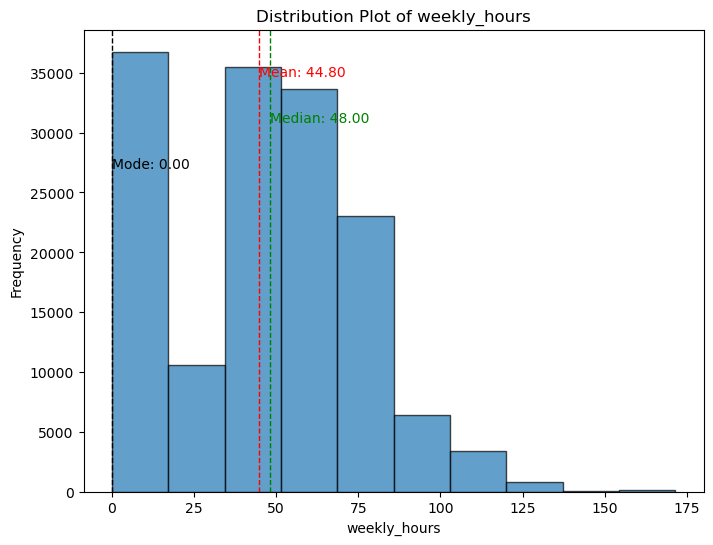

In [92]:
histo_graph(final_df,'weekly_hours')

In [93]:
final_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count_x,is_open,attributes,categories,hours,avg_review_stars,review_count_y,total_useful_votes,elite_user_count,review_count_per_bussiness,avg_fans_per_reviewer,checkin_count,tip_count,total_compliments,success,arts,auto,automotive,bars,beauty,beauty spas,breakfast,breakfast brunch,brunch,burgers,coffee,coffee tea,entertainment,event,event planning,fashion,fast,fast food,food,garden,hair,hair salons,health,health medical,home,home garden,home services,hotels,hotels travel,life,local,local services,medical,nightlife,pet,pizza,planning,planning services,repair,restaurants,salons,sandwiches,services,shopping,shops,spas,stores,tea,traditional,travel,OutdoorSeating,AgesAllowed,Open24Hours,RestaurantsDelivery,WiFi,NoiseLevel,ByAppointmentOnly,RestaurantsReservations,HappyHour,RestaurantsCounterService,WheelchairAccessible,BYOB,BusinessAcceptsBitcoin,GoodForKids,Corkage,HasTV,RestaurantsPriceRange2,BusinessAcceptsCreditCards,DriveThru,AcceptsInsurance,RestaurantsTableService,GoodForDancing,BYOBCorkage,RestaurantsTakeOut,Alcohol,DogsAllowed,CoatCheck,RestaurantsAttire,BikeParking,RestaurantsGoodForGroups,Smoking,Caters,BusinessParking_garage,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,BusinessParking_street,GoodForMeal_brunch,GoodForMeal_dinner,GoodForMeal_dessert,GoodForMeal_breakfast,GoodForMeal_latenight,GoodForMeal_lunch,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_classy,Ambience_touristy,Ambience_casual,Ambience_trendy,Ambience_divey,Ambience_upscale,DietaryRestrictions_kosher,DietaryRestrictions_soy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_vegetarian,DietaryRestrictions_dairy-free,DietaryRestrictions_halal,Music_background_music,Music_jukebox,Music_video,Music_live,Music_dj,Music_karaoke,Music_no_music,BestNights_wednesday,BestNights_friday,BestNights_tuesday,BestNights_thursday,BestNights_sunday,BestNights_monday,BestNights_saturday,HairSpecializesIn_coloring,HairSpecializesIn_kids,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_asian,HairSpecializesIn_perms,HairSpecializesIn_extensions,HairSpecializesIn_straightperms,weekly_hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",{},4.857143,7,9,7,18.428571,0.571429,1.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",3.133333,15,19,15,138.266667,5.733333,15.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,48.0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department 

In [94]:
# gives no of unique cities avaible in datset
print(len(final_df['city'].value_counts().unique()))

250


In [95]:
# gives no of unique postal_code avaible in datset
print(len(final_df['postal_code'].value_counts().unique()))

367


In [96]:
# gives no of unique states avaible in datset
print(len(final_df['state'].value_counts().unique()))

18


In [97]:
numerical_df = final_df.select_dtypes(include=['number'])

In [98]:
numerical_df.shape

(150346, 65)

In [99]:
# Calculate the correlation matrix
corr = numerical_df.corr()

# Set a threshold for high correlation
threshold = 0.7

# Create a set to hold the unique pairs of highly correlated features
high_corr_pairs = set()

# Iterate through the correlation matrix
for col in corr.columns:
    for row in corr.index:
        # Check if the correlation is above the threshold (both positive and negative) and avoid repeated pairs
        if col != row and abs(corr.loc[row, col]) > threshold:
            # Store pairs in a sorted order to avoid duplicates
            pair = tuple(sorted((row, col)))
            high_corr_pairs.add((pair[0], pair[1], corr.loc[row, col]))

# Convert to a DataFrame for easier visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Display the highly correlated feature pairs
print(high_corr_df)


                Feature 1                   Feature 2  Correlation
0                planning           planning services     0.931710
1             hair salons                      salons     0.827557
2          review_count_x              review_count_y     0.999785
3                  garden                 home garden     1.000000
4                    hair                      salons     0.767858
5          review_count_y                   tip_count     0.828872
6                  coffee                  coffee tea     0.981136
7        elite_user_count                   tip_count     0.828872
8        elite_user_count              review_count_x     0.999785
9                  hotels               hotels travel     0.947288
10       elite_user_count              review_count_y     1.000000
11                   hair                 hair salons     0.845930
12         event planning           planning services     0.960371
13         review_count_x                   tip_count     0.82

In [100]:
final_df.shape

(150346, 155)

In [101]:
null_values(final_df)

,Null Values,Null Values %,NaN Values,NaN Values %
business_id,0,0.000000,0,0.000000
name,0,0.000000,0,0.000000
address,0,0.000000,0,0.000000
city,0,0.000000,0,0.000000
state,0,0.000000,0,0.000000
postal_code,0,0.000000,0,0.000000
latitude,0,0.000000,0,0.000000
longitude,0,0.000000,0,0.000000
review_count_x,0,0.000000,0,0.000000
is_open,0,0.000000,0,0.000000


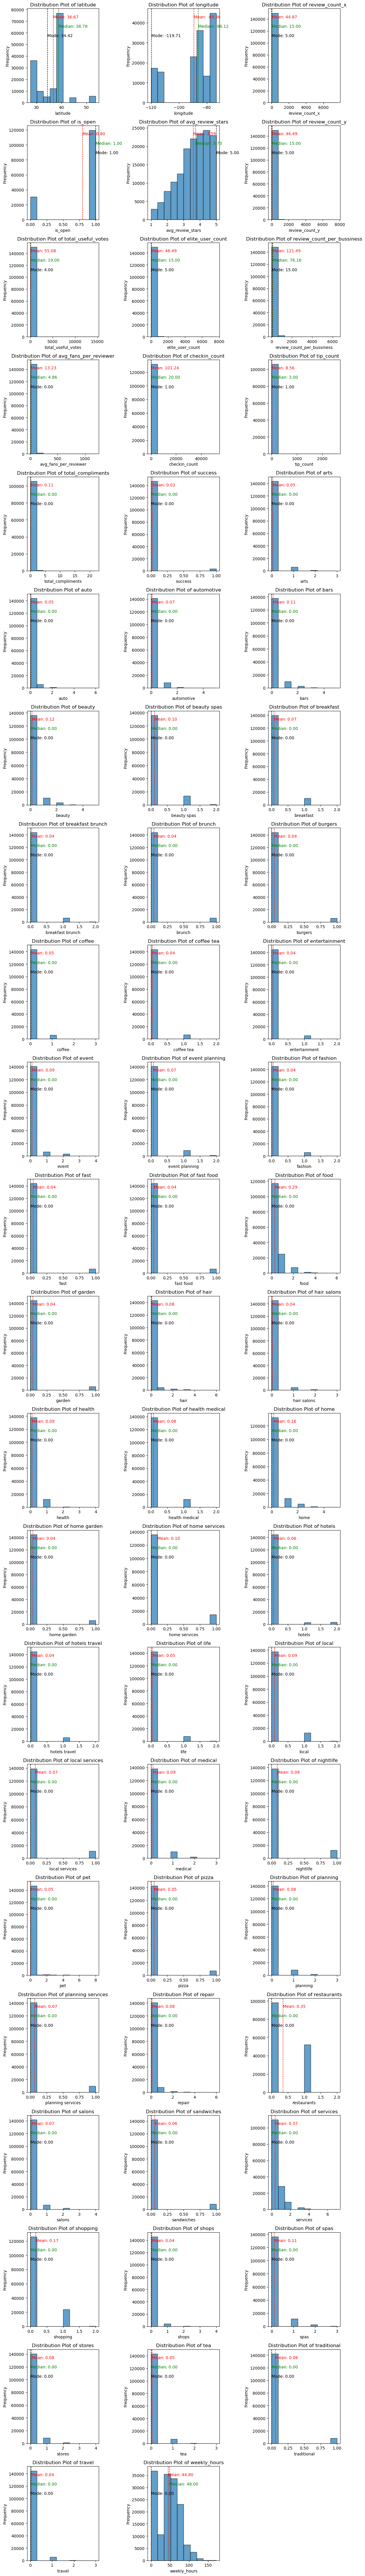

In [102]:
numerical_columns = final_df.select_dtypes(include=['number']).columns

# Create subplots
num_columns = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_columns + 1) // 2, ncols=3, figsize=(12, 4 * ((num_columns + 1) // 2)))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Call the histo_graph function for each numerical column
for i, col in enumerate(numerical_columns):
    histo_graph( final_df, col,axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

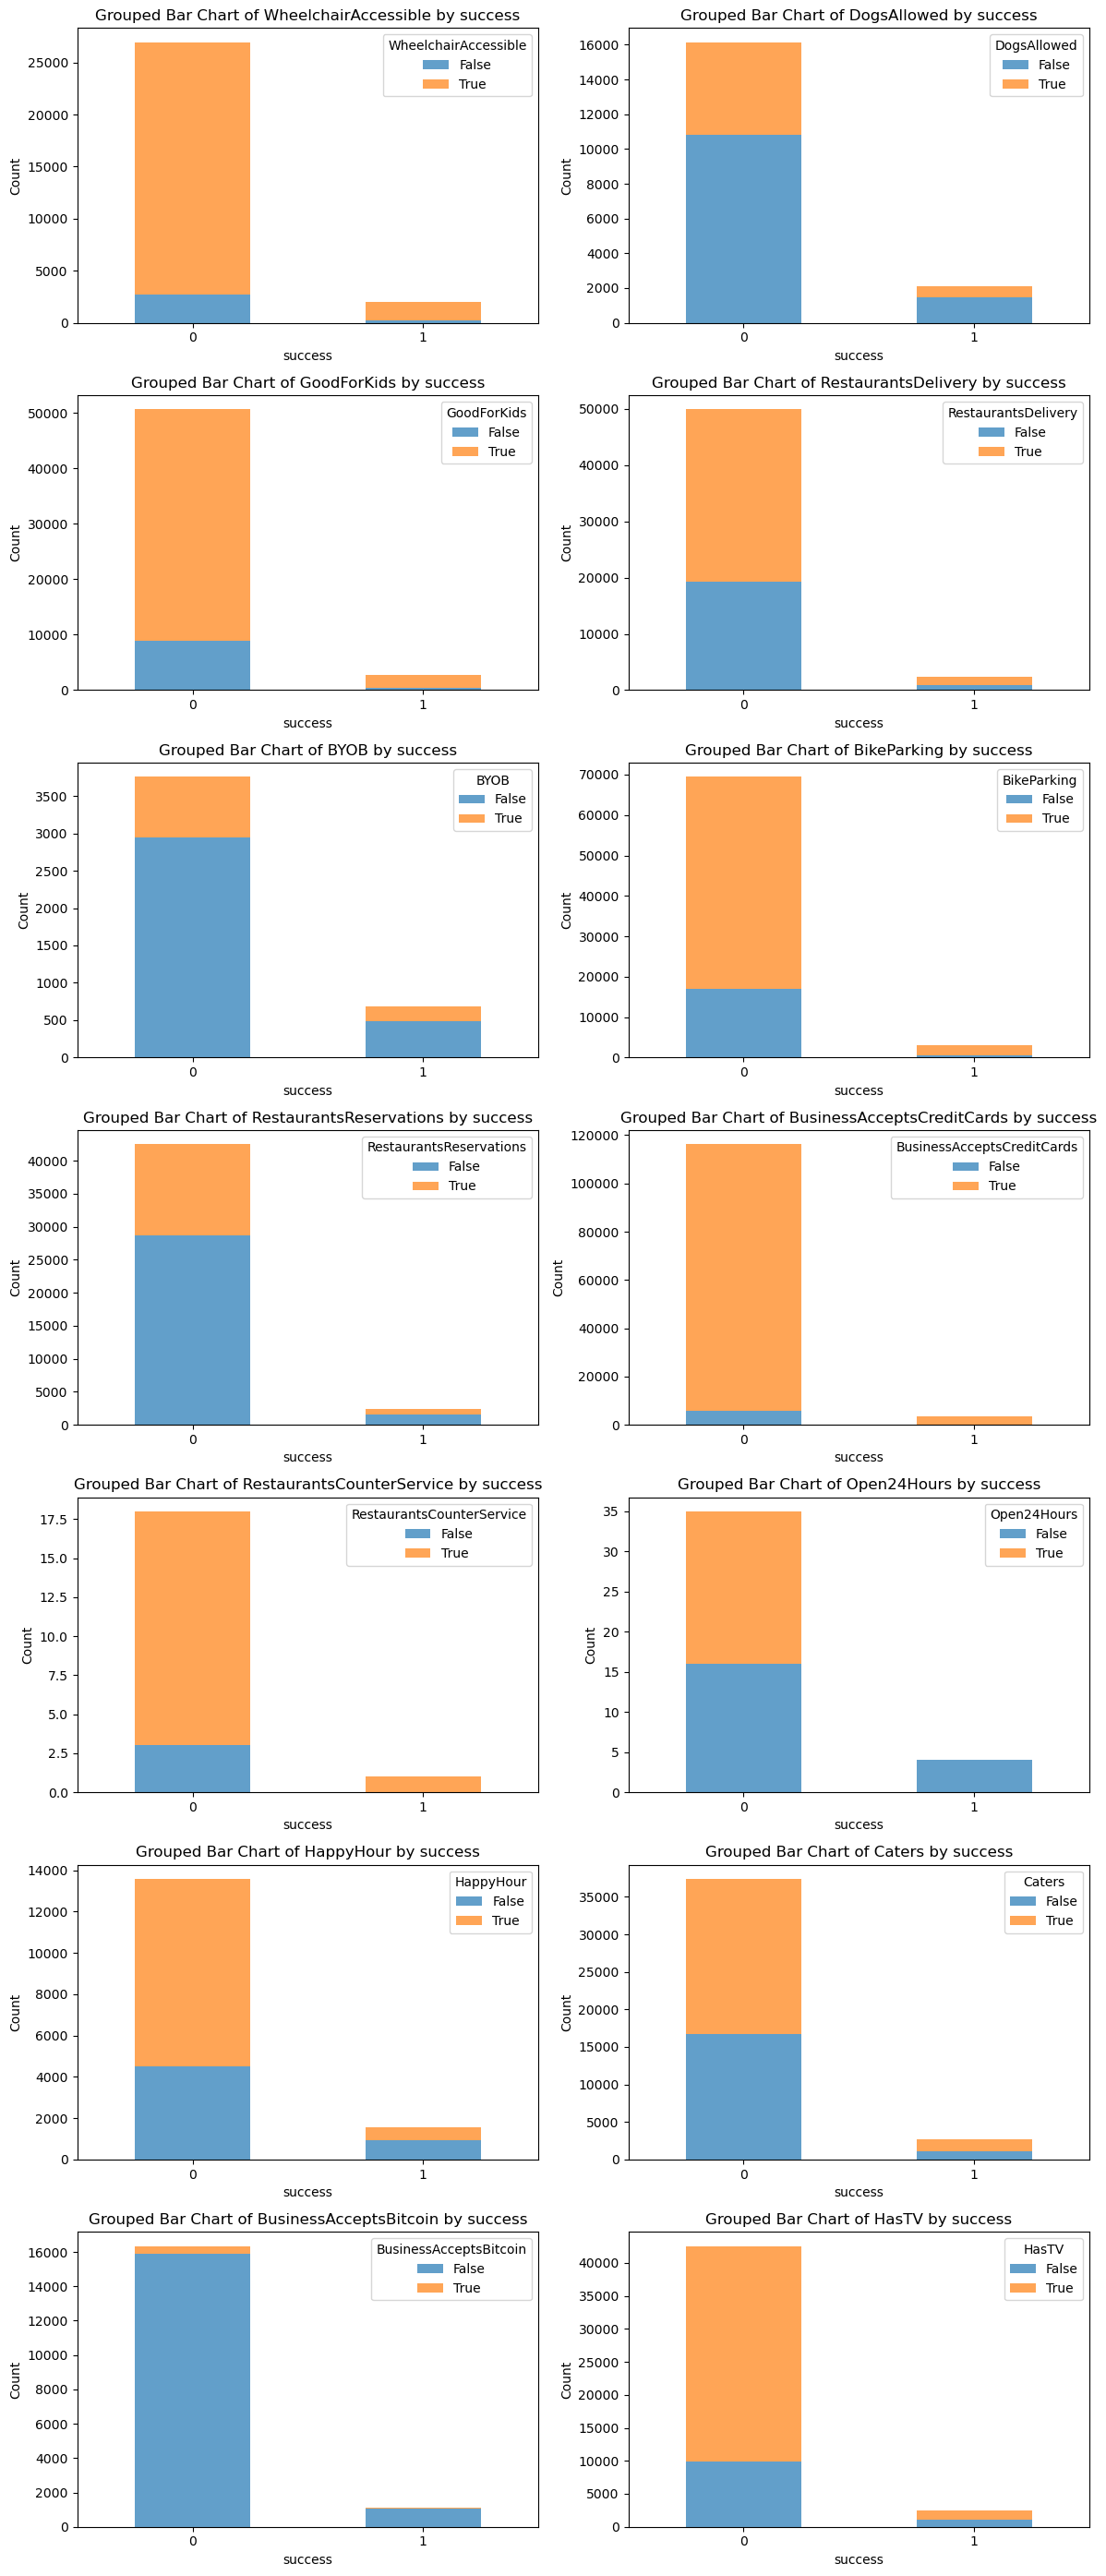

In [103]:
# Apply boolean normalization
bool_cols = [
    'WheelchairAccessible', 'DogsAllowed', 'GoodForKids', 'RestaurantsDelivery', 
    'BYOB', 'BikeParking', 'RestaurantsReservations', 'BusinessAcceptsCreditCards',
    'RestaurantsCounterService', 'Open24Hours', 'HappyHour', 'Caters', 
    'BusinessAcceptsBitcoin', 'HasTV'
]

# Extract binary (boolean) columns
boolean_df = final_df[bool_cols]
binary_columns = boolean_df.columns.tolist()

# Check if there are binary columns to plot
if binary_columns:
    # Calculate number of rows needed for subplots
    num_columns = len(binary_columns)
    nrows = (num_columns + 1) // 2  # Calculate number of rows needed

    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 4 * nrows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Create grouped bar charts for each binary feature against the validation column
    for i, col in enumerate(binary_columns):
        if col != 'success':  # Skip the validation column itself
            grouped_data = final_df.groupby(['success', col]).size().unstack(fill_value=0)
            grouped_data.plot(kind='bar', stacked=True, ax=axes[i], alpha=0.7)

            axes[i].set_title(f'Grouped Bar Chart of {col} by success')
            axes[i].set_xlabel('success')
            axes[i].set_ylabel('Count')
            axes[i].legend(title=col)
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()
else:
    print("No binary columns found to plot.")


#### If you observer Review_count, checkin_count and tip_count, they are strongly colreated with each other, this suggest that any one of these feature conveys same information as other, so we are just keeping Review_count feature and droping others

#### now if you observe tip_count and total_compliments, you can see that they are also correlated. this suugess that if one might take take time to complement they are most probably are tiping, we can drop this if we need while doing model tuning 

#### similary, if you observe RestaurantsDelivery,OutdoorSeating,RestaurantsTakeOut and Caters. they are mildly correlated with each others. this might be if the restarent is big enough they might be providing all these options. if our model overfits, we can drop some of these features

#### there is also a mild correlation between BikeParking,RestaurantsTakeOut and BusinessParking ,this suugest that if restaurants has BusinessParking, they might also offeing take out. coming to parking if they have BusinessParking, they most probably having bike parking as bikes wont take much space. we can drop BikeParking,RestaurantsTakeOut and keep BusinessParking if model overfits.


In [105]:
#final_df.to_csv('final_df.csv', index=False)

In [106]:
numerical_col = final_df.select_dtypes(include=['number'])

In [107]:
numerical_col.shape

(150346, 65)

In [108]:
# Compute the correlation matrix
correlation_matrix = numerical_col.corr()

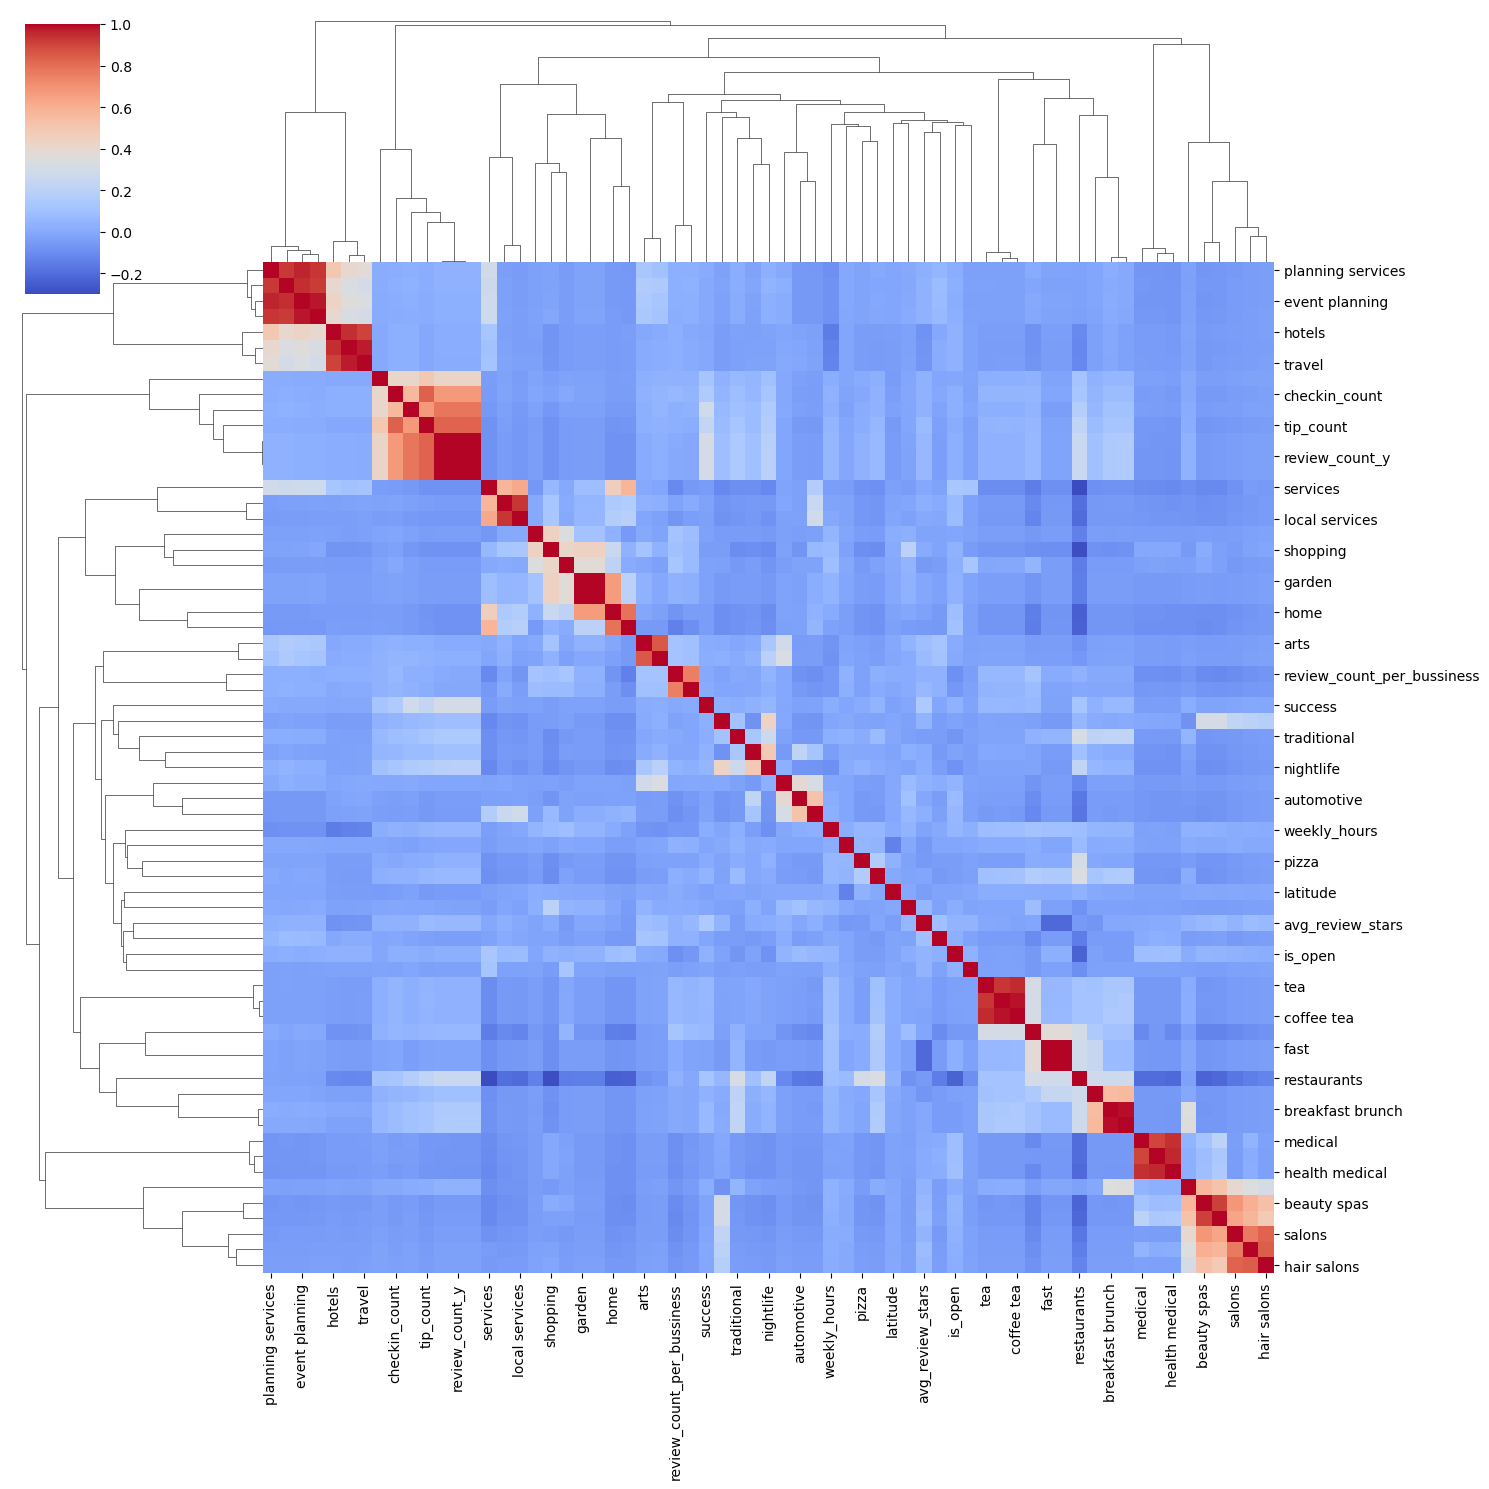

In [109]:
sns.clustermap(correlation_matrix, annot=False, cmap='coolwarm', figsize=(15, 15))

In [110]:
# Identify the top correlated pairs
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Filter the pairs for high correlations (exclude self-correlation)
high_corr_pairs = correlation_pairs[(correlation_pairs.abs() > 0.8) & (correlation_pairs.abs() < 1.0)]

# Print the top correlations
print(high_corr_pairs)


review_count_y     elite_user_count     1.000000
elite_user_count   review_count_y       1.000000
review_count_x     review_count_y       0.999785
review_count_y     review_count_x       0.999785
elite_user_count   review_count_x       0.999785
review_count_x     elite_user_count     0.999785
brunch             breakfast brunch     0.987988
breakfast brunch   brunch               0.987988
coffee             coffee tea           0.981136
coffee tea         coffee               0.981136
planning           event planning       0.975233
event planning     planning             0.975233
hotels travel      travel               0.972028
travel             hotels travel        0.972028
event planning     planning services    0.960371
planning services  event planning       0.960371
health             health medical       0.959054
health medical     health               0.959054
tea                coffee tea           0.950189
coffee tea         tea                  0.950189
event              e

1. review_count_y, review_count_x, elite_user_count: Keep **review_count_y** and drop the other two.
2. brunch, breakfast brunch: Keep **brunch** and drop breakfast brunch.
3. coffee, coffee tea, tea: Keep **coffee** and drop coffee tea and tea.
4. planning, event planning, planning services, event: Keep **planning** and drop the others.
5. hotels travel, travel, hotels: Keep **travel** and drop hotels travel and hotels.
6. health, health medical, medical: Keep **health** and drop health medical and medical.
7. local, local services: Keep **local** and drop local services.
8. spas, beauty spas: Keep **spas** and drop beauty spas.
9. entertainment, arts: Keep **entertainment** and drop arts.
10. hair salons, hair, salons: Keep **hair salons** and drop hair and salons.
11. tip_count, checkin_count: Keep **tip_count** and drop checkin_count.

In [112]:
columns_to_drop = [
    'review_count_x', 'elite_user_count', 'breakfast brunch', 'coffee tea', 'tea',
    'event planning', 'planning services', 'event', 'hotels travel', 'hotels',
    'health medical', 'medical', 'local services', 'beauty spas', 'arts',
    'hair', 'salons', 'checkin_count'
]

# Drop the correlated features from the DataFrame
final_df.drop(columns=columns_to_drop, inplace = True)


In [113]:
binary_columns = [
    "RestaurantsTableService",
    "WiFi",
    "OutdoorSeating",
    "RestaurantsCounterService",
    "Smoking",
    "Corkage",
    "BYOB",
    "Open24Hours",
    "Alcohol",
    "RestaurantsGoodForGroups",
    "RestaurantsTakeOut",
    "AgesAllowed",
    "RestaurantsDelivery",
    "ByAppointmentOnly",
    "DriveThru",
    "RestaurantsPriceRange2",
    "AcceptsInsurance",
    "DogsAllowed",
    "BusinessAcceptsCreditCards",
    "CoatCheck",
    "GoodForDancing",
    "NoiseLevel",
    "HappyHour",
    "WheelchairAccessible",
    "RestaurantsAttire",
    "HasTV",
    "BYOBCorkage",
    "BikeParking",
    "BusinessAcceptsBitcoin",
    "RestaurantsReservations",
    "Caters",
    "GoodForKids",
    "BusinessParking_street",
    "BusinessParking_valet",
    "BusinessParking_garage",
    "BusinessParking_validated",
    "BusinessParking_lot",
    "GoodForMeal_lunch",
    "GoodForMeal_dessert",
    "GoodForMeal_breakfast",
    "GoodForMeal_brunch",
    "GoodForMeal_latenight",
    "GoodForMeal_dinner",
    "Ambience_intimate",
    "Ambience_upscale",
    "Ambience_casual",
    "Ambience_romantic",
    "Ambience_divey",
    "Ambience_touristy",
    "Ambience_hipster",
    "Ambience_trendy",
    "Ambience_classy",
    "DietaryRestrictions_kosher",
    "DietaryRestrictions_vegan",
    "DietaryRestrictions_halal",
    "DietaryRestrictions_dairy-free",
    "DietaryRestrictions_soy-free",
    "DietaryRestrictions_gluten-free",
    "DietaryRestrictions_vegetarian",
    "Music_jukebox",
    "Music_background_music",
    "Music_dj",
    "Music_live",
    "Music_no_music",
    "Music_video",
    "Music_karaoke",
    "BestNights_monday",
    "BestNights_thursday",
    "BestNights_wednesday",
    "BestNights_tuesday",
    "BestNights_sunday",
    "BestNights_friday",
    "BestNights_saturday",
    "HairSpecializesIn_coloring",
    "HairSpecializesIn_curly",
    "HairSpecializesIn_straightperms",
    "HairSpecializesIn_perms",
    "HairSpecializesIn_africanamerican",
    "HairSpecializesIn_asian",
    "HairSpecializesIn_kids",
    "HairSpecializesIn_extensions"
]

for col in binary_columns:
    final_df[col] = final_df[col].map({True: 1, False: 0, 'True': 1, 'False': 0, 1: 1, 0: 0})

# Calculate the proportion of True values
true_proportions = final_df[binary_columns].mean()

# Filter out features where True values are <= 70%
columns_to_drop = true_proportions[true_proportions < 0.7].index.tolist()

print(columns_to_drop)
# Remove the binary features where True values are <= 70%
final_df.drop(columns=columns_to_drop, inplace = True)

['RestaurantsTableService', 'OutdoorSeating', 'Corkage', 'BYOB', 'Open24Hours', 'RestaurantsDelivery', 'ByAppointmentOnly', 'DriveThru', 'AcceptsInsurance', 'DogsAllowed', 'CoatCheck', 'GoodForDancing', 'HappyHour', 'BusinessAcceptsBitcoin', 'RestaurantsReservations', 'Caters', 'BusinessParking_street', 'BusinessParking_valet', 'BusinessParking_garage', 'BusinessParking_validated', 'BusinessParking_lot', 'GoodForMeal_lunch', 'GoodForMeal_dessert', 'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'GoodForMeal_latenight', 'GoodForMeal_dinner', 'Ambience_intimate', 'Ambience_upscale', 'Ambience_casual', 'Ambience_romantic', 'Ambience_divey', 'Ambience_touristy', 'Ambience_hipster', 'Ambience_trendy', 'Ambience_classy', 'DietaryRestrictions_kosher', 'DietaryRestrictions_vegan', 'DietaryRestrictions_halal', 'DietaryRestrictions_dairy-free', 'DietaryRestrictions_soy-free', 'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegetarian', 'Music_jukebox', 'Music_background_music', 'Music_dj'

In [114]:
# Select numerical columns
numerical_col = final_df.select_dtypes(include=['number'])

# Calculate the proportion of missing values for each numerical column
missing_proportions = numerical_col.isnull().mean()

# Filter columns with more than 80% missing values
columns_with_null = missing_proportions[missing_proportions > 0.8].index.tolist()

print("Numerical columns with more than 80% missing values:")
print(columns_with_null)

# Remove the numerical features where missing values are > 80%
final_df.drop(columns=columns_with_null, inplace = True)

Numerical columns with more than 80% missing values:
['AgesAllowed', 'WiFi', 'NoiseLevel', 'RestaurantsCounterService', 'WheelchairAccessible', 'RestaurantsPriceRange2', 'BYOBCorkage', 'Alcohol', 'RestaurantsAttire', 'Smoking', 'HairSpecializesIn_coloring', 'HairSpecializesIn_curly']


In [115]:
other_col = ['business_id', 'name', 'address', 	'city', 'postal_code',  'latitude',  'longitude', 'attributes',  'categories', 'hours']
final_df.drop(columns=other_col, inplace = True)

In [116]:
final_df.shape

(150346, 52)

In [117]:
final_df.head(10)

,state,is_open,avg_review_stars,review_count_y,total_useful_votes,review_count_per_bussiness,avg_fans_per_reviewer,tip_count,total_compliments,success,auto,automotive,bars,beauty,breakfast,brunch,burgers,coffee,entertainment,fashion,fast,fast food,food,garden,hair salons,health,home,home garden,home services,life,local,nightlife,pet,pizza,planning,repair,restaurants,sandwiches,services,shopping,shops,spas,stores,traditional,travel,GoodForKids,HasTV,BusinessAcceptsCreditCards,RestaurantsTakeOut,BikeParking,RestaurantsGoodForGroups,weekly_hours
0,CA,0,4.857143,7,9,18.428571,0.571429,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,MO,1,3.133333,15,19,138.266667,5.733333,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,NaN,NaN,1.0,NaN,NaN,NaN,48.0
2,AZ,0,3.500000,24,21,260.375000,27.833333,8.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,NaN,0.0,1.0,0.0,1.0,NaN,100.0
3,PA,1,4.057471,87,131,315.908046,27.896552,10.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,0.0,1.0,1.0,NaN,94.0
4,PA,1,4.692308,13,2,82.230769,4.615385,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,1.0,1.0,1.0,NaN,40.0
5,TN,1,2.166667,6,0,229.000000,8.833333,2.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,0.0,1.0,90.0
6,MO,1,2.307692,13,24,325.769231,48.923077,2.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,NaN,NaN,1.0,NaN,1.0,NaN,46.0
7,FL,1,3.600000,5,9,360.000000,40.600000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,40.0
8,MO,0,2.947368,19,21,86.736842,6.526316,8.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,1.0,1.0,1.0,NaN,1.0,0.0
9,TN,1,1.700000,10,2,34.100000,6.800000,2.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,NaN,0.0,76.0


In [118]:
final_df.dtypes

state                          object
is_open                         int64
avg_review_stars              float64
review_count_y                  int64
total_useful_votes              int64
review_count_per_bussiness    float64
avg_fans_per_reviewer         float64
tip_count                     float64
total_compliments             float64
success                         int32
auto                            int64
automotive                      int64
bars                            int64
beauty                          int64
breakfast                       int64
brunch                          int64
burgers                         int64
coffee                          int64
entertainment                   int64
fashion                         int64
fast                            int64
fast food                       int64
food                            int64
garden                          int64
hair salons                     int64
health                          int64
home        

In [119]:
from sklearn.model_selection import train_test_split

# Assuming 'final_df' is your DataFrame and the target variable is in the 'target' column
X = final_df.drop(columns=['success'])  # Features
y = final_df['success']                # Target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (105242, 51) (105242,)
Test set shape: (45104, 51) (45104,)


In [120]:
top_10_states = X_train['state'].value_counts().nlargest(10).index.tolist()

X_train['state_top10'] = X_train['state'].apply(lambda x: x if x in top_10_states else 'Other')
X_test['state_top10'] = X_test['state'].apply(lambda x: x if x in top_10_states else 'Other')

train_encoded = pd.get_dummies(X_train['state_top10'], prefix='state', drop_first=True)
X_train = pd.concat([X_train, train_encoded], axis=1)

test_encoded = pd.get_dummies(X_test['state_top10'], prefix='state', drop_first=True)
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)
X_test = pd.concat([X_test, test_encoded], axis=1)

# Drop original 'state' and 'state_top10' columns
X_train.drop(['state', 'state_top10'], axis=1, inplace=True)
X_test.drop(['state', 'state_top10'], axis=1, inplace=True)

In [121]:
null_values(X_train)

,Null Values,Null Values %,NaN Values,NaN Values %
is_open,0,0.000000,0,0.000000
avg_review_stars,0,0.000000,0,0.000000
review_count_y,0,0.000000,0,0.000000
total_useful_votes,0,0.000000,0,0.000000
review_count_per_bussiness,0,0.000000,0,0.000000
avg_fans_per_reviewer,0,0.000000,0,0.000000
tip_count,30866,29.328595,30866,29.328595
total_compliments,30866,29.328595,30866,29.328595
auto,0,0.000000,0,0.000000
automotive,0,0.000000,0,0.000000


In [122]:
X_train.head(5)

,is_open,avg_review_stars,review_count_y,total_useful_votes,review_count_per_bussiness,avg_fans_per_reviewer,tip_count,total_compliments,auto,automotive,bars,beauty,breakfast,brunch,burgers,coffee,entertainment,fashion,fast,fast food,food,garden,hair salons,health,home,home garden,home services,life,local,nightlife,pet,pizza,planning,repair,restaurants,sandwiches,services,shopping,shops,spas,stores,traditional,travel,GoodForKids,HasTV,BusinessAcceptsCreditCards,RestaurantsTakeOut,BikeParking,RestaurantsGoodForGroups,weekly_hours,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_NV,state_Other,state_PA,state_TN
92666,1,2.333333,6,4,248.500000,18.500000,1.0,0.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,NaN,NaN,1.0,NaN,NaN,NaN,73.0,False,False,False,False,False,False,False,False,True,False
50296,1,3.095238,42,119,49.761905,1.714286,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,NaN,NaN,1.0,NaN,NaN,NaN,45.0,False,False,False,False,False,False,False,True,False,False
89774,1,4.038462,26,36,83.500000,4.115385,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,1.0,1.0,0.0,NaN,69.0,False,True,False,False,False,False,False,False,False,False
144159,1,3.846154,13,28,241.384615,57.538462,15.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,1.0,NaN,1.0,NaN,0.0,False,True,False,False,False,False,False,False,False,False
26226,1,3.600000,10,2,15.900000,0.100000,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,1.0,NaN,1.0,NaN,0.0,False,False,False,False,False,False,False,False,False,True


In [123]:
from sklearn.impute import SimpleImputer
binary_features = [
    'HasTV', 'GoodForKids', 'BikeParking', 
    'RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'RestaurantsGoodForGroups'
]

# Create and fit the imputer for binary features
binary_imputer = SimpleImputer(strategy='most_frequent')
X_train[binary_features] = binary_imputer.fit_transform(X_train[binary_features])
X_test[binary_features] = binary_imputer.transform(X_test[binary_features])

In [124]:
numerical_features = ['tip_count', 'total_compliments']

# Create and fit the imputer for numerical features (using median)
numerical_imputer = SimpleImputer(strategy='median')
X_train[numerical_features] = numerical_imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = numerical_imputer.transform(X_test[numerical_features])

In [125]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (105242, 60) (105242,)
Test set shape: (45104, 60) (45104,)


In [126]:
X_train.to_csv("X_train.csv", index=False)

X_test.to_csv("X_test.csv", index=False)

y_train.to_csv("y_train.csv", index=False)

y_test.to_csv("y_test.csv", index=False)
